In [82]:
import numpy as np
import pandas as pd
from statistics import median
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


Check data distributions

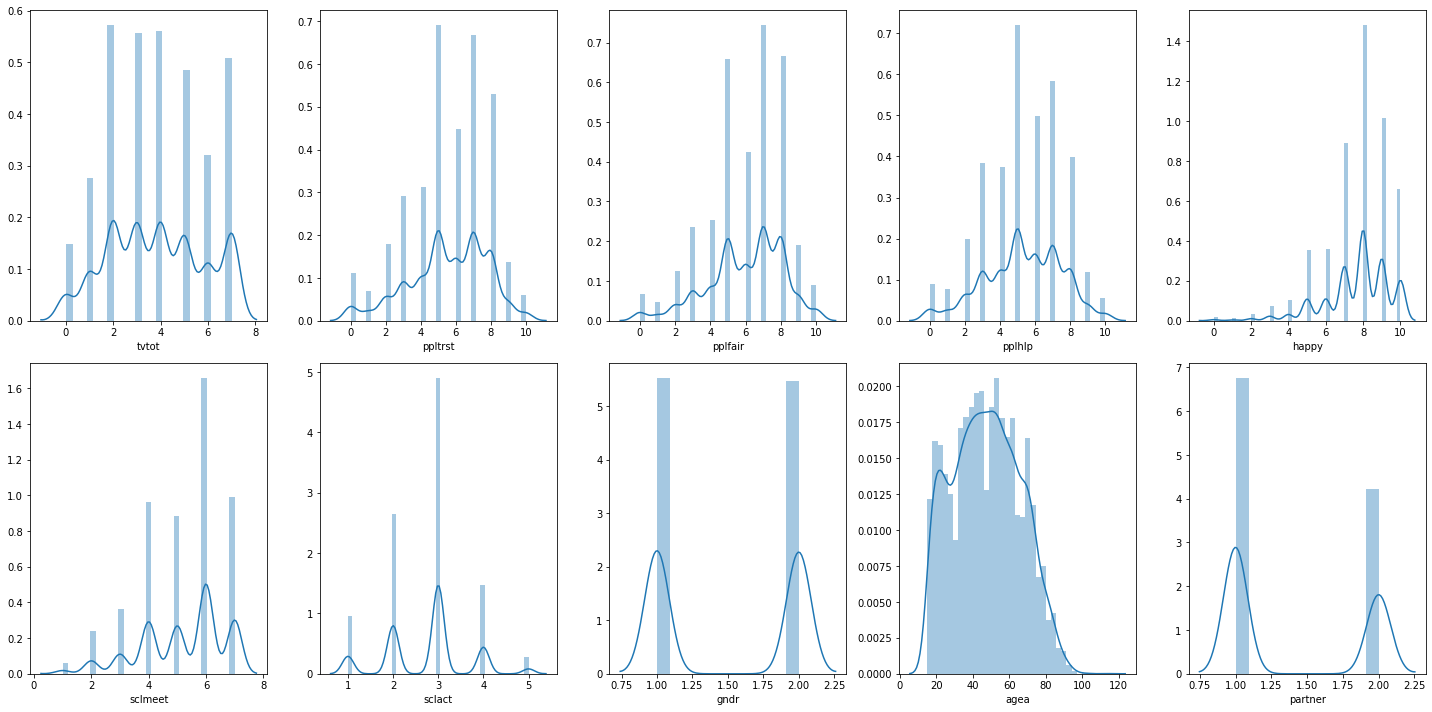

In [27]:
plt.figure(figsize=(20,10))

for i, var in enumerate(df.columns[3:]):
    plt.subplot(2,5,i+1)
    sns.distplot(df[var].dropna())
    
plt.tight_layout()
plt.show()

Our only continuous variable is age. The rest of the data are discrete/categorical. There may be enough data to approximate a normal distribution for some of the data. Gender and partner are binary categorical variables. Let's do a quick test of normality.

In [86]:
for var in df.columns[3:]:
    s, p = stats.normaltest(df[var].dropna())
    if p < 0.05:
        print(f'{var} has non-normal distribution and a p-value of {p:.2f}')
    else:
        print(f'{var} has normal distribution and a p-value of {p:.2f}')

tvtot has non-normal distribution and a p-value of 0.00
ppltrst has non-normal distribution and a p-value of 0.00
pplfair has non-normal distribution and a p-value of 0.00
pplhlp has non-normal distribution and a p-value of 0.00
happy has non-normal distribution and a p-value of 0.00
sclmeet has non-normal distribution and a p-value of 0.00
sclact has normal distribution and a p-value of 0.36
gndr has non-normal distribution and a p-value of 0.00
agea has non-normal distribution and a p-value of 0.00
partner has non-normal distribution and a p-value of 0.00


Only one variable qualifies as having a normal distribution. We will proceed to do our comparative statistics with non-parametric tests. If we compare the sclact variable, we will use parametric tests.

#### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

I will use a Wilcoxon signed-rank test to compute the test statistics. I am also going to impute median values for the missing data.

In [87]:
for var in df.columns[3:]:
    df[var].fillna(median(df[var]))

In [96]:
countries = df.cntry.unique()
years = df.year.unique()

for country in countries:
    year1 = df.loc[(df.year == years[0]) & (df.cntry == country), 'ppltrst']
    year2 = df.loc[(df.year == years[1]) & (df.cntry == country), 'ppltrst']
    
    s, p = stats.wilcoxon(year1, year2)
    diff = median(year1) - median(year2)
    
    if diff < 0:
        if p < 0.05:
            print(f'The people in {country} were significantly less trusting in 2014')
            print(f'Trust changed by {diff:.2f}, p-value = {p:.2f}\n')
        else:
            print(f'The people in {country} were non-significantly less trusting in 2014')
            print(f'Trust changed by {diff:.2f}, p-value = {p:.2f}\n')
    elif diff == 0:
        print(f'The people in {country} had the same amount of trust in both years')
        print(f'Trust changed by {diff:.2f}, p-value = {p:.2f}\n')
    else:
        if p < 0.05:
            print(f'The people in {country} were significantly more trusting in 2014')
            print(f'Trust changed by {diff:.2f}, p-value = {p:.2f}\n')
        else:
            print(f'The people in {country} were non-significantly more trusting in 2014')
            print(f'Trust changed by {diff:.2f}, p-value = {p:.2f}\n')
   

The people in CH had the same amount of trust in both years
Trust changed by 0.00, p-value = 0.44

The people in CZ were non-significantly less trusting in 2014
Trust changed by -3.00, p-value = 0.29

The people in DE were non-significantly less trusting in 2014
Trust changed by -0.50, p-value = 0.92

The people in ES had the same amount of trust in both years
Trust changed by 0.00, p-value = 0.01

The people in NO had the same amount of trust in both years
Trust changed by 0.00, p-value = 0.61

The people in SE were significantly more trusting in 2014
Trust changed by 1.00, p-value = 0.03



#### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [105]:
var = 'happy'

for country in countries:
    year1 = df.loc[(df.year == years[0]) & (df.cntry == country), var]
    year2 = df.loc[(df.year == years[1]) & (df.cntry == country), var]
    
    s, p = stats.wilcoxon(year1, year2)
    diff = median(year1) - median(year2)
    
    if diff < 0:
        if p < 0.05:
            print(f'The people in {country} were significantly less {var} in 2014')
            print(f'{var} changed by {diff:.2f}, p-value = {p:.2f}\n')
        else:
            print(f'The people in {country} were non-significantly less {var} in 2014')
            print(f'{var} changed by {diff:.2f}, p-value = {p:.2f}\n')
    elif diff == 0:
        print(f'The people in {country} had the same amount of {var} in both years')
        print(f'{var} changed by {diff:.2f}, p-value = {p:.2f}\n')
    else:
        if p < 0.05:
            print(f'The people in {country} were significantly more {var} in 2014')
            print(f'{var} changed by {diff:.2f}, p-value = {p:.2f}\n')
        else:
            print(f'The people in {country} were non-significantly more {var} in 2014')
            print(f'{var} changed by {diff:.2f}, p-value = {p:.2f}\n')

The people in CH had the same amount of happy in both years
happy changed by 0.00, p-value = 0.82

The people in CZ were significantly more happy in 2014
happy changed by 3.00, p-value = 0.01

The people in DE had the same amount of happy in both years
happy changed by 0.00, p-value = 0.39

The people in ES had the same amount of happy in both years
happy changed by 0.00, p-value = 0.05

The people in NO had the same amount of happy in both years
happy changed by 0.00, p-value = 0.00

The people in SE had the same amount of happy in both years
happy changed by 0.00, p-value = 0.51



#### 3. Who reported watching more TV in 2012, men or women?

In [110]:
men = df.loc[(df.year == years[0]) & (df.gndr == 1), 'tvtot']
women = df.loc[(df.year == years[0]) & (df.gndr == 2), 'tvtot']

s, p = stats.mannwhitneyu(women, men)
diff = median(men) - median(women)
    
print(f'There was a non-significant difference of {diff} (men > women) with a p-value of {p:.2f}')

There was a non-significant difference of 0.0 (men > women) with a p-value of 0.22


#### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


In [112]:
alone = df.loc[(df.year == years[0]) & (df.partner == 1), 'pplfair']
partner = df.loc[(df.year == years[0]) & (df.partner == 2), 'pplfair']

s, p = stats.mannwhitneyu(alone, partner)
diff = median(alone) - median(partner)
    
print(f'There was a non-significant difference of {diff} (alone > partner) with a p-value of {p:.2f}')

There was a non-significant difference of 5.0 (alone > partner) with a p-value of 0.00


#### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [124]:
c1 = df.loc[(df.cntry == countries[0]) & (df.year == years[1]), 'sclmeet']
c2 = df.loc[(df.cntry == countries[1]) & (df.year == years[1]), 'sclmeet']
c3 = df.loc[(df.cntry == countries[3]) & (df.year == years[1]), 'sclmeet']
c4 = df.loc[(df.cntry == countries[4]) & (df.year == years[1]), 'sclmeet']

In [163]:
H,p = stats.kruskal(c1,c2,c3,c4,nan_policy='omit')

In [164]:
print(f'There is a significant difference among the groups, p-value = {p:.2f}')

There is a significant difference among the groups, p-value = 0.00


Let's do pairwise comparisons using the Mann-Whitney U test to compare differences.

In [154]:
test_countries = [countries[0], countries[1], countries[3], countries[4]]
cs = [c1, c2, c3, c4]
us = []
ps = []
tests = []

for i in range(len(cs)-1):
    for j in range(len(cs) -1 -i):
        u, p = stats.mannwhitneyu(cs[i], cs[3-j])
        tests.append(f'{countries[i]} vs {countries[3-j]}')
        us.append(u)
        ps.append(p)

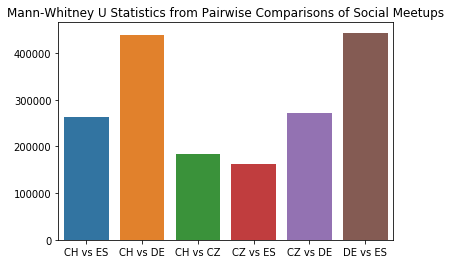

In [156]:
sns.barplot(y=us, x=tests)
plt.title('Mann-Whitney U Statistics from Pairwise Comparisons of Social Meetups')
plt.show()

The greatest differences are between DE vs ES and CH vs DE

#### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [160]:
# Classify people as either young or old using the median value 

df['young'] = np.where(df.agea < median(df.agea),1,0)

In [165]:
# Young
young_c1 = df.loc[(df.cntry == countries[0]) & (df.year == years[1]) & (df.young == 1), 'sclmeet']
young_c2 = df.loc[(df.cntry == countries[1]) & (df.year == years[1]) & (df.young == 1), 'sclmeet']
young_c3 = df.loc[(df.cntry == countries[3]) & (df.year == years[1]) & (df.young == 1), 'sclmeet']
young_c4 = df.loc[(df.cntry == countries[4]) & (df.year == years[1]) & (df.young == 1), 'sclmeet']

# Old
old_c1 = df.loc[(df.cntry == countries[0]) & (df.year == years[1]) & (df.young == 0), 'sclmeet']
old_c2 = df.loc[(df.cntry == countries[1]) & (df.year == years[1]) & (df.young == 0), 'sclmeet']
old_c3 = df.loc[(df.cntry == countries[3]) & (df.year == years[1]) & (df.young == 0), 'sclmeet']
old_c4 = df.loc[(df.cntry == countries[4]) & (df.year == years[1]) & (df.young == 0), 'sclmeet']

In [166]:
test_countries = [countries[0], countries[1], countries[3], countries[4]]
young_cs = [young_c1, young_c2, young_c3, young_c4]
young_us = []
young_ps = []
young_tests = []

for i in range(len(young_cs)-1):
    for j in range(len(young_cs) -1 -i):
        u, p = stats.mannwhitneyu(young_cs[i], young_cs[3-j])
        young_tests.append(f'{countries[i]} vs {countries[3-j]}')
        young_us.append(u)
        young_ps.append(p)
        
old_cs = [old_c1, old_c2, old_c3, old_c4]
old_us = []
old_ps = []
old_tests = []

for i in range(len(old_cs)-1):
    for j in range(len(old_cs) -1 -i):
        u, p = stats.mannwhitneyu(old_cs[i], old_cs[3-j])
        old_tests.append(f'{countries[i]} vs {countries[3-j]}')
        old_us.append(u)
        old_ps.append(p)

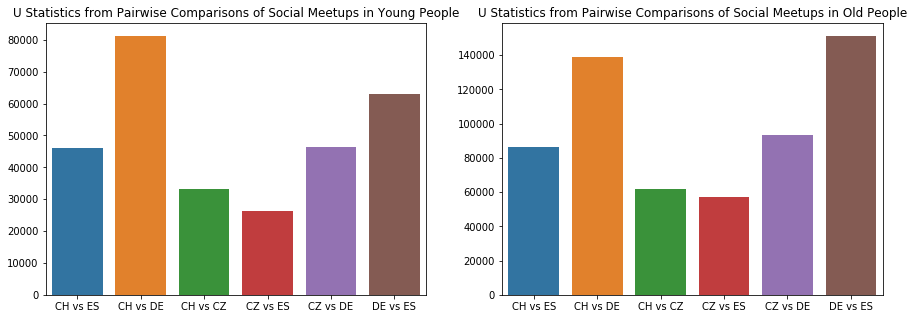

In [171]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y=young_us, x=young_tests)
plt.title('U Statistics from Pairwise Comparisons of Social Meetups in Young People')

plt.subplot(1,2,2)
sns.barplot(y=old_us, x=old_tests)
plt.title('U Statistics from Pairwise Comparisons of Social Meetups in Old People')

plt.show()